In [2]:
## import libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

%matplotlib inline


In [3]:
Data = pd.read_csv('/Users/inazawaelectronics/Desktop/Data-Analyst-Intern-Project/FIFA WORLD CUP ANALYSIS PROJECT/Data/WorldCups.csv')
Data

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [11]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            20 non-null     int64 
 1   Country         20 non-null     object
 2   Winner          20 non-null     object
 3   Runners-Up      20 non-null     object
 4   Third           20 non-null     object
 5   Fourth          20 non-null     object
 6   GoalsScored     20 non-null     int64 
 7   QualifiedTeams  20 non-null     int64 
 8   MatchesPlayed   20 non-null     int64 
 9   Attendance      20 non-null     object
dtypes: int64(4), object(6)
memory usage: 1.7+ KB


In [19]:
# Convert to float, handling errors
Data['Attendance'] = pd.to_numeric(Data['Attendance'], errors='coerce')

In [20]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            20 non-null     int64  
 1   Country         20 non-null     object 
 2   Winner          20 non-null     object 
 3   Runners-Up      20 non-null     object 
 4   Third           20 non-null     object 
 5   Fourth          20 non-null     object 
 6   GoalsScored     20 non-null     int64  
 7   QualifiedTeams  20 non-null     int64  
 8   MatchesPlayed   20 non-null     int64  
 9   Attendance      6 non-null      float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.7+ KB


In [16]:
df = Data.copy()

df['Attendance'] = pd.to_numeric(df['Attendance'], errors='coerce')

# Create a column to check if the host country won
df['Host_Won'] = df.apply(lambda row: row['Country'] == row['Winner'], axis=1)

# Count the total number of tournaments and the number where the host won
host_wins = df['Host_Won'].sum()
total_tournaments = df.shape[0]
host_win_percentage = (host_wins / total_tournaments) * 100

print(f"Host countries won {host_wins} out of {total_tournaments} tournaments, which is {host_win_percentage:.2f}% of the time.")


Host countries won 5 out of 20 tournaments, which is 25.00% of the time.


In [17]:
# Group by 'Country' (host) to see how many times each host country has won
host_country_performance = df.groupby('Country')['Host_Won'].sum().reset_index()
host_country_performance.columns = ['Host Country', 'Wins as Host']

# Calculate winning frequency
host_country_performance['Winning_Frequency'] = (host_country_performance['Wins as Host'] / total_tournaments) * 100


In [18]:
# Group by 'Country' to get aggregate match outcome stats for host years
host_match_stats = df.groupby('Country').agg({
    'GoalsScored': 'mean',
    'MatchesPlayed': 'mean',
    'Attendance': 'mean'
}).reset_index()

host_match_stats.columns = ['Host Country', 'Avg Goals Scored', 'Avg Matches Played', 'Avg Attendance']


In [22]:
# Merge host performance with match outcome stats
host_performance_data = host_country_performance.merge(host_match_stats, on='Host Country', how='left')


/var/folders/8h/34w8609j6936zp6y_871bvk00000gn/T/ipykernel_3763/2755730583.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=host_performance_data, x='Host Country', y='Winning_Frequency', palette='Blues')


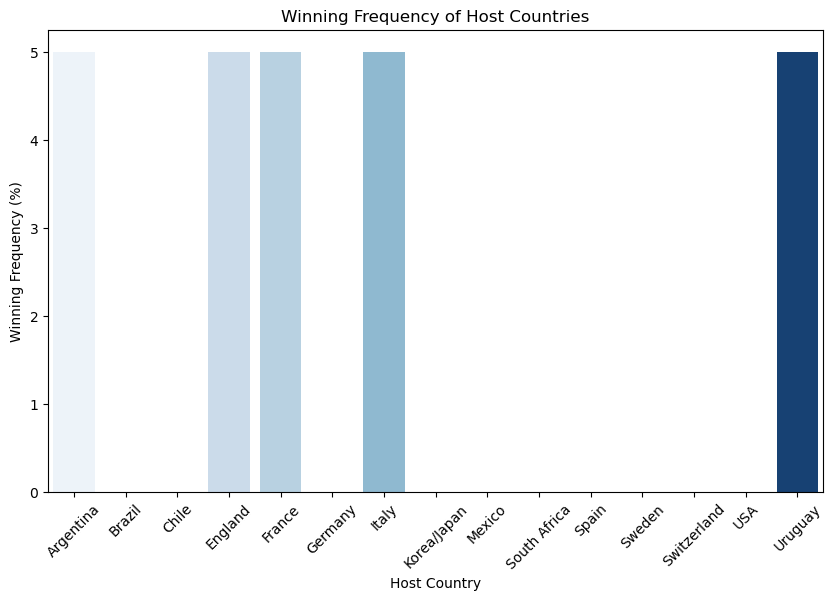

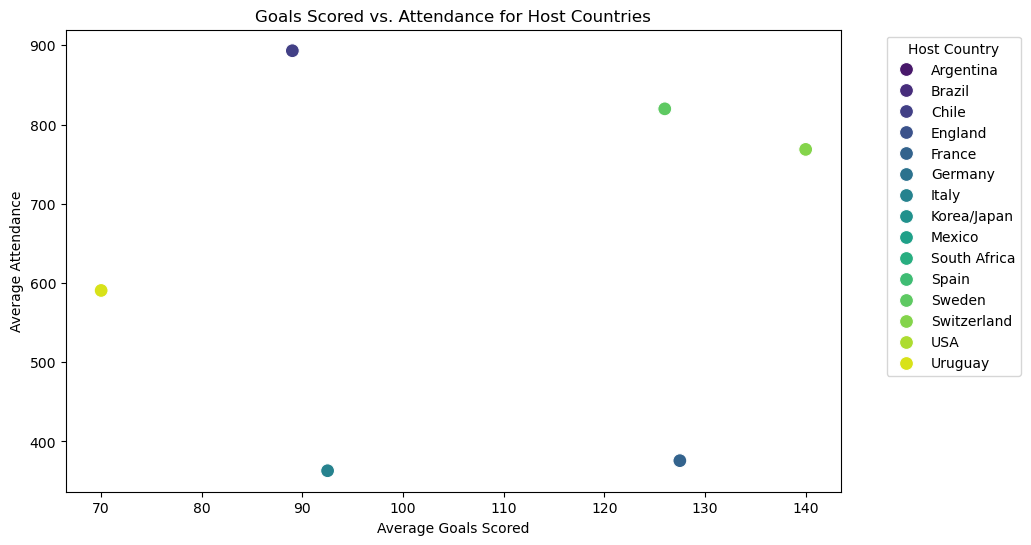

In [23]:

# Bar plot for host win frequency
plt.figure(figsize=(10, 6))
sns.barplot(data=host_performance_data, x='Host Country', y='Winning_Frequency', palette='Blues')
plt.title('Winning Frequency of Host Countries')
plt.xlabel('Host Country')
plt.ylabel('Winning Frequency (%)')
plt.xticks(rotation=45)
plt.show()

# Scatter plot for goals scored vs. attendance for host countries
plt.figure(figsize=(10, 6))
sns.scatterplot(data=host_performance_data, x='Avg Goals Scored', y='Avg Attendance', hue='Host Country', s=100, palette='viridis')
plt.title('Goals Scored vs. Attendance for Host Countries')
plt.xlabel('Average Goals Scored')
plt.ylabel('Average Attendance')
plt.legend(title='Host Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()